In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


In [2]:
def h(X):
    return (X**5) / (1 + (X - 3) ** 2) * (X >= 0)


def g_cauchy(x):
    return 1 / (np.pi * (1 + x**2))


def importance_sampling_cauchy(samples, v):
    f_samples = stats.t.pdf(samples, df=v)
    g_samples = g_cauchy(samples)
    weights = f_samples / g_samples
    h_values = h(samples)

    estimate = np.mean(weights * h_values)

    return estimate

def g_normal(x, v):
    return stats.norm.pdf(x, loc=0, scale=np.sqrt(v / (v - 2)))


def importance_sampling_normal(samples, v):
    f_samples = stats.t.pdf(samples, df=v)
    g_samples = g_normal(samples, v)

    weights = f_samples / g_samples
    h_values = h(samples)
    return np.mean(weights * h_values)

def g_exponential(x):
    return np.exp(-x) * (x >= 0)


def importance_sampling_exponential(samples):
    f_samples = stats.t.pdf(samples, df=12)

    g_samples = g_exponential(samples)

    weights = f_samples / g_samples
    h_values = h(samples)

    estimate = np.mean(weights * h_values)

    return estimate

In [3]:
normal_samples = []
cauchy_samples = []
exp_samples = []
mc_samples = []

for i in range(1000):
    samples_cauchy = np.random.standard_cauchy(size=1000)
    cauchy_samples.append(importance_sampling_cauchy(samples_cauchy, 12))

    samples_exponential = np.random.exponential(1, size=1000)
    exp_samples.append(importance_sampling_exponential(samples_exponential))

    samples = stats.t.rvs(df=12, size=1000)
    mc_samples.append(np.mean(h(samples)))

    samples_normal = np.random.normal(0, np.sqrt(12 / (12 - 2)), size=100)

    normal_samples.append(importance_sampling_normal(samples_normal, 12))


normal_data = np.array(normal_samples)
cauchy_data = np.array(cauchy_samples)
mc_data= np.array(mc_samples)
exp_data = np.array(exp_samples)


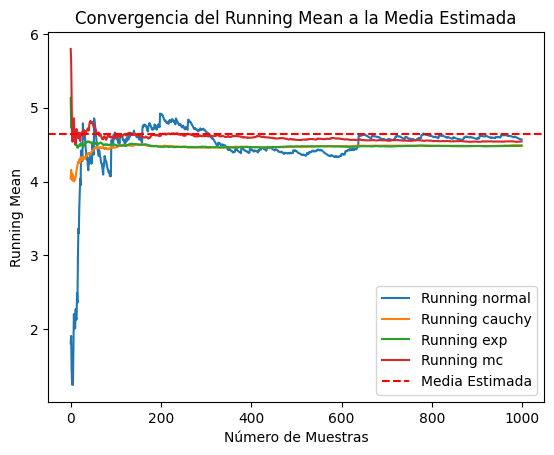

In [ ]:
# Estimar E[X^2] y construir la gráfica de la convergencia de los "running means"
running_normal = np.cumsum(normal_data) / np.arange(1, 1000 + 1)
running_cauchy = np.cumsum(cauchy_data) / np.arange(1, 1000 + 1)
running_exp = np.cumsum(exp_data) / np.arange(1, 1000 + 1)
running_mc = np.cumsum(mc_data) / np.arange(1, 1000 + 1)

# Graficar la convergencia
plt.plot(running_normal, label="Running normal")
plt.plot(running_cauchy, label="Running cauchy")
plt.plot(running_exp, label="Running exp")
plt.plot(running_mc, label="Running mc")

plt.axhline(y=4.64, color="r", linestyle="--", label="Media Real")
plt.xlabel("Número de Muestras")
plt.ylabel("Running Mean")
plt.legend()
plt.title("Convergencia del Running Mean a la Media Estimada")
plt.show()